**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KDTree
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.memoryX = X
            self.memoryY = y
            self.k = np.unique(y)
            self.n = self.k.shape[0]
        else:
            self.tree = KDTree(X)
            self.memoryY = y
            self.k = np.unique(y)
            self.n = self.k.shape[0]  # Число признаков

    def predict(self, X):
        if self.algorithm == 'brute':
            dist = pairwise_distances(X, self.memoryX)
            temp = np.argpartition(dist, self.n_neighbors)
            temp = temp[:, :self.n_neighbors]
            cls = self.memoryY[temp]  # Матрица классов ближайших соседей
        else:
            dist, ind = self.tree.query(X, k=self.n_neighbors)
            cls = self.memoryY[ind]
        ans = np.zeros((X.shape[0], self.n))
        for i in range(self.n):
            ans[:, i] = np.sum(cls == self.k[i], axis=1)
        ans = np.argmax(ans, axis=1)
        ans = self.k[ans]
        return ans

    def predict_proba(self, X):
        if self.algorithm == 'brute':
            dist = pairwise_distances(X, self.memoryX)
            temp = np.argpartition(dist, self.n_neighbors)
            temp = temp[:, :self.n_neighbors]
            cls = self.memoryY[temp]
        else:
            dist, ind = self.tree.query(X, k=self.n_neighbors)
            cls = self.memoryY[ind]
        ans = np.zeros((X.shape[0], self.n))
        for i in range(self.n):                           # Раз встречался
            ans[:, i] = np.sum(cls == self.k[i], axis=1)  # каждый класс
        return ans/self.n_neighbors

    def score(self, X, y):
        res = self.predict(X)
        a = np.array([res == y])
        return np.sum(a)/len(y)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 874 µs, sys: 78 µs, total: 952 µs
Wall time: 799 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 308 µs, sys: 27 µs, total: 335 µs
Wall time: 272 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 474 µs, sys: 3.72 ms, total: 4.19 ms
Wall time: 26.5 ms


array([2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 1.08 ms


array([2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 2.15 ms, sys: 0 ns, total: 2.15 ms
Wall time: 2.51 ms


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.16 ms, sys: 0 ns, total: 1.16 ms
Wall time: 809 µs


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

Max score: n_neighbors =  17
Max score ==  0.982


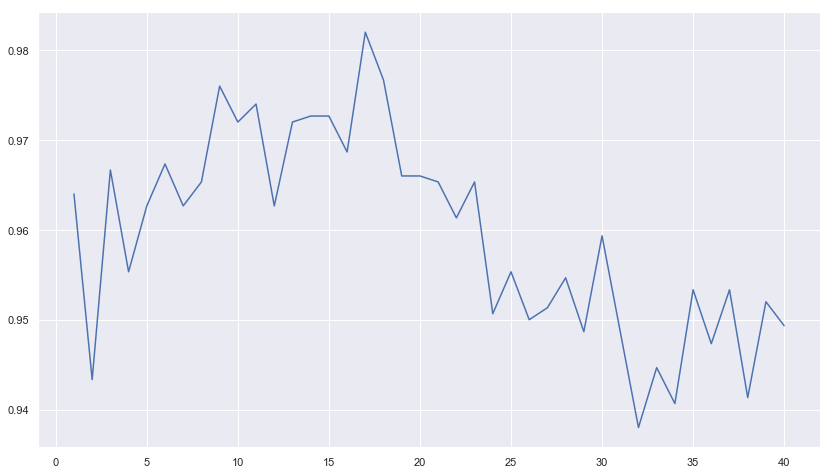

In [14]:
#%%pycodestyle
score = np.zeros(40)
for i in range(40):
    clfs = []
    clfs.append(MyKNeighborsClassifier(n_neighbors=i+1))
    for j in range(100):
        iris = datasets.load_iris()
        X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                            iris.target,
                                                            test_size=0.1,
                                                            stratify=iris.
                                                            target,
                                                            shuffle=True)
        clfs[-1].fit(X_train, y_train)
        score[i] += clfs[-1].score(X_test, y_test)
    score[i] = score[i]/100
opt_k = np.argmax(score)+1
sns.set()
fig = plt.figure(figsize=(14, 8))
plt.plot(np.arange(1, 41), score, color='b')
print('Max score: n_neighbors = ', opt_k)
print('Max score == ', score[opt_k-1])

**MNIST**

In [15]:
mnist = fetch_openml('mnist_784')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 207 ms, sys: 0 ns, total: 207 ms
Wall time: 205 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 78 ms, sys: 0 ns, total: 78 ms
Wall time: 77.2 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 3.37 s, sys: 280 ms, total: 3.65 s
Wall time: 2.1 s


array(['7', '9', '6', '9', '8', '4', '1', '3', '8', '0', '1', '0', '8',
       '5', '0', '7', '9', '6', '4', '3', '4', '0', '8', '4', '4', '0',
       '6', '1', '4', '0', '0', '9', '9', '3', '1', '5', '0', '3', '0',
       '1', '5', '6', '4', '3', '8', '3', '2', '9', '4', '3', '3', '2',
       '7', '7', '2', '9', '8', '8', '7', '7', '0', '9', '4', '0', '8',
       '2', '9', '8', '4', '8', '8', '7', '7', '2', '1', '6', '4', '5',
       '5', '5', '8', '0', '7', '9', '0', '7', '9', '7', '1', '5', '9',
       '0', '1', '0', '7', '9', '3', '2', '0', '4', '1', '6', '3', '1',
       '0', '7', '5', '7', '8', '0', '9', '1', '3', '1', '4', '9', '0',
       '4', '1', '7', '8', '2', '5', '4', '9', '1', '5', '2', '5', '3',
       '5', '4', '9', '3', '7', '2', '4', '3', '8', '6', '0', '2', '4',
       '6', '6', '6', '2', '3', '3', '8', '6', '8', '1', '7', '8', '2',
       '2', '8', '5', '6', '7', '6', '9', '6', '7', '7', '1', '4', '3',
       '6', '0', '9', '1', '7', '0', '5', '6', '0', '5', '0', '6

In [21]:
%time my_clf.predict(X_test)

CPU times: user 3.79 s, sys: 276 ms, total: 4.07 s
Wall time: 2.26 s


array(['7', '9', '6', '9', '8', '4', '1', '3', '8', '0', '1', '0', '8',
       '5', '0', '7', '9', '6', '4', '3', '4', '0', '8', '4', '4', '0',
       '6', '1', '4', '0', '0', '9', '9', '3', '1', '5', '0', '3', '0',
       '1', '5', '6', '4', '3', '8', '3', '2', '9', '4', '3', '3', '2',
       '7', '7', '2', '9', '8', '8', '7', '7', '0', '9', '4', '0', '8',
       '2', '9', '8', '4', '8', '8', '7', '7', '2', '1', '6', '4', '5',
       '5', '5', '8', '0', '7', '9', '0', '7', '9', '7', '1', '5', '9',
       '0', '1', '0', '7', '9', '3', '2', '0', '4', '1', '6', '3', '1',
       '0', '7', '5', '7', '8', '0', '9', '1', '3', '1', '4', '9', '0',
       '4', '1', '7', '8', '2', '5', '4', '9', '1', '5', '2', '5', '3',
       '5', '4', '9', '3', '7', '2', '4', '3', '8', '6', '0', '2', '4',
       '6', '6', '6', '2', '3', '3', '8', '6', '8', '1', '7', '8', '2',
       '2', '8', '5', '6', '7', '6', '9', '6', '7', '7', '1', '4', '3',
       '6', '0', '9', '1', '7', '0', '5', '6', '0', '5', '0', '6

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 3.5 s, sys: 264 ms, total: 3.77 s
Wall time: 2.17 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 3.89 s, sys: 276 ms, total: 4.17 s
Wall time: 2.32 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
clf.score(X_test, y_test)

0.9728571428571429

In [25]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=opt_k, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=opt_k, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 56.6 s, sys: 52.9 ms, total: 56.7 s
Wall time: 56.6 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1min, sys: 122 ms, total: 1min
Wall time: 1min


In [30]:
%time clf.predict(X_test)

CPU times: user 1min 17s, sys: 10.7 ms, total: 1min 17s
Wall time: 1min 17s


array(['0', '9', '7', '9', '6', '3', '4', '0', '7', '6', '8', '2', '1',
       '5', '5', '7', '9', '0', '1', '9', '5', '8', '7', '1', '8', '8',
       '8', '9', '0', '7', '8', '0', '9', '5', '9', '8', '3', '7', '4',
       '6', '0', '4', '2', '7', '3', '8', '7', '7', '5', '0', '5', '3',
       '3', '7', '3', '8', '4', '5', '3', '5', '3', '8', '2', '2', '2',
       '4', '0', '9', '6', '7', '6', '3', '8', '0', '4', '0', '4', '8',
       '2', '5', '7', '3', '2', '0', '6', '9', '5', '7', '8', '9', '1',
       '5', '6', '2', '1', '5', '1', '2', '7', '8', '9', '9', '5', '0',
       '4', '2', '3', '1', '8', '0', '4', '1', '7', '0', '6', '3', '4',
       '0', '6', '0', '8', '9', '3', '9', '8', '6', '3', '1', '2', '5',
       '6', '6', '8', '9', '7', '5', '5', '8', '9', '2', '9', '3', '5',
       '4', '8', '4', '4', '2', '7', '1', '1', '0', '2', '5', '7', '0',
       '4', '8', '8', '2', '9', '6', '4', '1', '8', '5', '0', '0', '6',
       '7', '1', '7', '1', '7', '6', '3', '4', '2', '9', '7', '0

In [31]:
%time my_clf.predict(X_test)

CPU times: user 1min 2s, sys: 35.4 ms, total: 1min 2s
Wall time: 1min 2s


array(['0', '9', '7', '9', '6', '3', '4', '0', '7', '6', '8', '2', '1',
       '5', '5', '7', '9', '0', '1', '9', '5', '8', '7', '1', '8', '8',
       '8', '9', '0', '7', '8', '0', '9', '5', '9', '8', '3', '7', '4',
       '6', '0', '4', '2', '7', '3', '8', '7', '7', '5', '0', '5', '3',
       '3', '7', '3', '8', '4', '5', '3', '5', '3', '8', '2', '2', '2',
       '4', '0', '9', '6', '7', '6', '3', '8', '0', '4', '0', '4', '8',
       '2', '5', '7', '3', '2', '0', '6', '9', '5', '7', '8', '9', '1',
       '5', '6', '2', '1', '5', '1', '2', '7', '8', '9', '9', '5', '0',
       '4', '2', '3', '1', '8', '0', '4', '1', '7', '0', '6', '3', '4',
       '0', '6', '0', '8', '9', '3', '9', '8', '6', '3', '1', '2', '5',
       '6', '6', '8', '9', '7', '5', '5', '8', '9', '2', '9', '3', '5',
       '4', '8', '4', '4', '2', '7', '1', '1', '0', '2', '5', '7', '0',
       '4', '8', '8', '2', '9', '6', '4', '1', '8', '5', '0', '0', '6',
       '7', '1', '7', '1', '7', '6', '3', '4', '2', '9', '7', '0

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 17s, sys: 104 ms, total: 1min 17s
Wall time: 1min 17s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 3s, sys: 3.74 ms, total: 1min 3s
Wall time: 1min 3s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9757142857142858

In [35]:
my_clf.score(X_test, y_test)

0.9757142857142858

Задание 5

In [ ]:
# seaborn - более высокоуровневая визуалиция, чем в matplotlib, проще визуализировать сложные объекты,
#                                                              накладывать сетку и т.д.
# matplotlib  - визуализация, графики
# train_test_split - делит датасет на train и test 
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - конвейер, последовательное выполнение действий,
#                                                              например fit(), predict(), score()
# StandardScaler (from sklearn.preprocessing import StandardScaler) - стандартизация, т.е. все признаки приводятся
#                                                                      к виду: мат. ожидание = 0, дисперсия = 1
# ClassifierMixin - возвращает среднее значение accuracy, можно использовать в 3 задании для более точной оценки
# NeighborsBase - используется для реализации классификатора sklearn
# KNeighborsMixin - используется в sklearn для поиска ближайших соседей
# SupervisedIntegerMixin - проверяет тип параметров (int) и вызывает функцию